In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import redditutils as ru
import word2vecReader as wvr

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

from skopt import BayesSearchCV


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
!ls

100k_response.pkl             random_forest.pkl
100k_train.pkl                reddit-ETL.ipynb
1k_features.pkl               redditutils.py
1k_response.pkl               results.csv
25k_test.pkl                  seinfeld-chronicles
25k_test_features.pkl         short_test_matrix.csv.mtx
Model_tuning.ipynb            short_train_matrix.csv.mtx
Project Fletcher Proposal.pdf shower_clean.csv
README.md                     showerthoughts-clean.ipynb
ROC_AUC.png                   showerthoughts.csv
__pycache__                   test-time.ipynb
bayes_search.pkl              test.csv
classification.ipynb          test_csv.csv.
cleaned_shower.csv            tfidf.ipynb
cleaning.csv                  tokenized.csv
count-vec-models.ipynb        train.csv
darkweb-EDA.ipynb             truth.pkl
final_df.csv                  vectorized_df
final_model.pkl               vectorized_df.csv
first_5k_response.pkl         w2v_mod.pkl
first_5k_words.pkl            word2vec.ipynb
fitted_cv.pkl               

In [156]:
df = pd.read_csv('final_df.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [157]:
df['dow'] = pd.DatetimeIndex(df['created_utc']).dayofweek

In [158]:
df['dow'] = df['dow'].fillna(df['dow'].median()).astype(int).astype(str)

In [167]:
df['hour'] = pd.DatetimeIndex(df['created_utc']).hour
df['hour'] = df['hour'].fillna(df['hour'].median()).astype(int).astype(str)

In [169]:
X = df[['title', 'hour', 'dow']]
y = df['quality']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2325)

In [171]:
X_train_short = X_train[:100000]
X_test_short = X_test[:25000]

y_train_short = y_train[:100000]
y_test_short = y_test[:25000]

In [172]:
imp = Imputer(missing_values = np.nan, strategy = 'mean')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [173]:
hour_dummies = pd.get_dummies(X_train_short['hour'])

In [175]:
X_train_short = X_train_short.join(hour_dummies)

In [176]:
X_train_short.drop(labels=['hour'], axis=1, inplace=True)

In [177]:
dow_dummies = pd.get_dummies(X_train_short['dow'])

In [178]:
X_train_short = X_train_short.join(dow_dummies, rsuffix='dow')

In [179]:
X_train_short.drop(labels=['dow'], inplace=True, axis=1)

## Gradient Boosting

In [180]:
gb = GradientBoostingClassifier()

In [184]:
scores = cross_val_score(gb, X_train_short.drop(labels=['title'], axis=1), y_train_short, cv=3, scoring='roc_auc')

In [185]:
scores

array([0.50147408, 0.50355746, 0.49818025])

## Random Forest

In [192]:
rfc = RandomForestClassifier()

In [193]:
scores = cross_val_score(rfc, X_train_short.drop(labels=['title'], axis=1), y_train_short, cv=3, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [195]:
train.head()

,title,0,1,10,11,12,13,14,15,16,...,8,9,0dow,1dow,2dow,3dow,4dow,5dow,6dow,quality
997869,past year taken many body telling going start ...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
417471,protein basically trail mix pretentious mushed...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
373705,group people making fun,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
28057,sometimes egg comes sometimes reverse probably...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
783897,crawfish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [198]:
df.loc[373705, :]

title           group people making fun
score                                 2
id                               8k8gv6
created_utc         2018-05-17 22:46:03
selftext                      [removed]
num_comments                          0
quality                               1
hour                                 22
dow                                   3
title_len                            23
Name: 373705, dtype: object

In [186]:
train = X_train_short.join(y_train_short)

In [121]:
import seaborn as sns

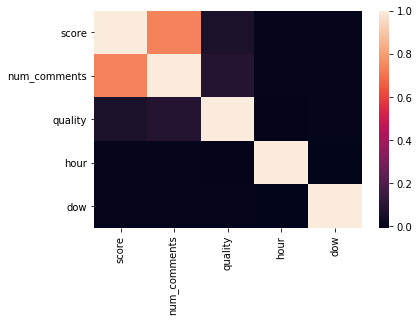

In [124]:
train['title_len']

In [187]:
df['title_len'] = df['title'].apply(lambda x: len(x))

In [190]:
from scipy.stats import pearsonr

In [199]:
!ls *.pkl

100k_response.pkl     final_model.pkl       preds.pkl
100k_train.pkl        first_5k_response.pkl random_forest.pkl
1k_features.pkl       first_5k_words.pkl    truth.pkl
1k_response.pkl       fitted_cv.pkl         w2v_mod.pkl
25k_test.pkl          fitted_lda_short.pkl  word2vec_mod.pkl
25k_test_features.pkl fixed_100k_train.pkl
bayes_search.pkl      new_feat.pkl


In [201]:
import pickle

In [202]:
preds = pickle.load(open('preds.pkl', 'rb'))

In [203]:
truth = pickle.load(open('truth.pkl', 'rb'))

In [207]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [206]:
recall_score(preds, truth)

0.4900537634408602

In [208]:
precision_score(preds, truth)

0.18483220115583493

In [209]:
from imblearn.over_sampling import SMOTE